# 21회 모의고사

## 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.<br>
1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.<br>
1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.<br>
1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, <br>
현업에서 사용시 주의할 점 등에 대해 기술하시오.<br>

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv("../ADP_book_ver01/data/student_data.csv")
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


## 1-1. 시각화 포함 탐색적 자료분석(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [6]:
df.shape

(395, 14)

In [7]:
print('총 데이터 개수는 294개이며, 변수의 개수는 종속 변수를 포함하여 총 14개이다.')
print('이 중 범주형으로 보이는 변수는 school, sex, paid, activities 4가지이며, 나머지 변수는 수치형 변수이다. 범주형 변수는 Barplot으로, 수치형 변수는 Boxplot으로 변수의 분포를 시각화한다.')

총 데이터 개수는 294개이며, 변수의 개수는 종속 변수를 포함하여 총 14개이다.
이 중 범주형으로 보이는 변수는 school, sex, paid, activities 4가지이며, 나머지 변수는 수치형 변수이다. 범주형 변수는 Barplot으로, 수치형 변수는 Boxplot으로 변수의 분포를 시각화한다.


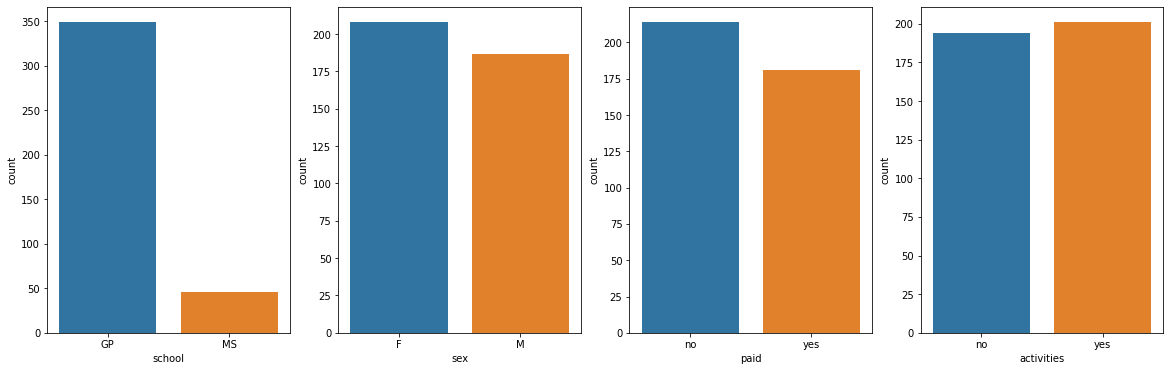

먼저, 범주형 변수들의 분포를 살펴보면, school 변수의 클래스 불균형이 눈에 띈다. 나머지 변수의 분포는 대체적으로 고른 편이다.


In [8]:
cat_col = ["school", "sex", "paid", "activities"]

fig, axes = plt.subplots(ncols=4, figsize=(20, 6))
for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, ax=axes[i])
plt.show()
print("먼저, 범주형 변수들의 분포를 살펴보면, school 변수의 클래스 불균형이 눈에 띈다. 나머지 변수의 분포는 대체적으로 고른 편이다.")

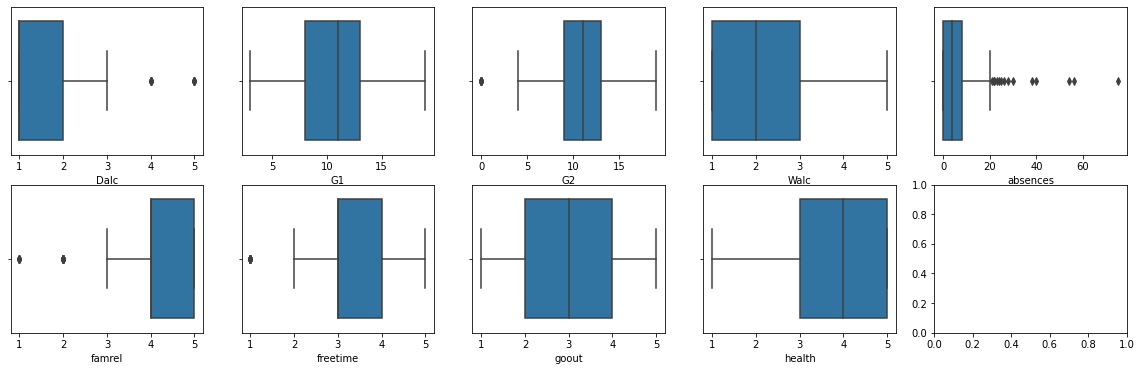

Boxplot으로 수치형 변수들의 분포를 확인해 보니, absences의 이상치 개수가 특히 눈에 띈다. 일부 학생들이 결석을 집중적으로 많이 하는 케이스로 생각되며, 이상치의 영향을 고려한 분석이 필요하다.


In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
for i, col in enumerate(df.columns.difference(['grade'] + cat_col)):
    row_ = i//5
    col_ = i%5
    sns.boxplot(x=col, data=df, ax=axes[row_][col_])
plt.show()
print("Boxplot으로 수치형 변수들의 분포를 확인해 보니, absences의 이상치 개수가 특히 눈에 띈다. 일부 학생들이 결석을 집중적으로 많이 하는 케이스로 생각되며, 이상치의 영향을 고려한 분석이 필요하다.")

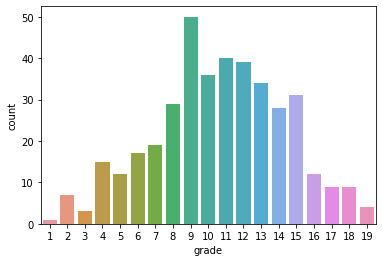

학생의 grade 분포는 모양을 봤을 때 거의 정규분포에 가까운 종 모양이며, 평균은 10.660759493670886으로 중간에 위치한다.


In [10]:
sns.countplot(x='grade', data=df)
plt.show()

print(f"학생의 grade 분포는 모양을 봤을 때 거의 정규분포에 가까운 종 모양이며, 평균은 {df.grade.mean()}으로 중간에 위치한다.")

## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.


In [11]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [12]:
print("famrel, freetime, goout, Dalc, Walc, health, absences 변수에서 이상치가 발견되었다. 이를 처리하고 예측하는 방법으로는 단순 평균 대치와 특정 값 대치, KNN-Imputer를 사용하는 것이 있다.")
print("모든 변수가 K-NN 적용이 용이한 연속형 변수이고, 데이터의 분포와 특성을 고려한 인접 이웃의 값으로 결측치를 보정하는 것이 가장 합리적일 것이라는 생각이 들어 KNN-Imputer를 선택하였다.")

famrel, freetime, goout, Dalc, Walc, health, absences 변수에서 이상치가 발견되었다. 이를 처리하고 예측하는 방법으로는 단순 평균 대치와 특정 값 대치, KNN-Imputer를 사용하는 것이 있다.
모든 변수가 K-NN 적용이 용이한 연속형 변수이고, 데이터의 분포와 특성을 고려한 인접 이웃의 값으로 결측치를 보정하는 것이 가장 합리적일 것이라는 생각이 들어 KNN-Imputer를 선택하였다.


In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed = pd.DataFrame(imputer.fit_transform(df.loc[:, df.columns.difference(['grade'] + cat_col)]), columns=df.columns.difference(['grade'] + cat_col))

for col in imputed.columns:
    df.loc[:, col] = imputed[col]

In [14]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [15]:
print("Imputer 적용 후, 모든 변수의 이상치가 제거된 것을 확인하였다.")

Imputer 적용 후, 모든 변수의 이상치가 제거된 것을 확인하였다.


## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.

In [16]:
print("현재 데이터의 범주형 변수는 school, sex, paid, activities 4개 있으며, 모두 문자로 되어 있어 모델이 처리할 수 없는 형태이다. 이를 모델이 이해할 수 있는 형태로 변형해야 한다.")
print("범주형 변수를 카테고리의 유무로 표현하는 One-hot encoding을 적용하여 범주형 변수들을 변환한다.")
print("변환 후, 카테고리 변수들이 1과 0으로 표현된 것을 확인할 수 있으며, 이를 수치형 테이블과 합하여 새로운 테이블을 구성한다.")

현재 데이터의 범주형 변수는 school, sex, paid, activities 4개 있으며, 모두 문자로 되어 있어 모델이 처리할 수 없는 형태이다. 이를 모델이 이해할 수 있는 형태로 변형해야 한다.
범주형 변수를 카테고리의 유무로 표현하는 One-hot encoding을 적용하여 범주형 변수들을 변환한다.
변환 후, 카테고리 변수들이 1과 0으로 표현된 것을 확인할 수 있으며, 이를 수치형 테이블과 합하여 새로운 테이블을 구성한다.


In [17]:
dummies = pd.get_dummies(df.loc[:, cat_col])

for col in dummies.columns:
    dummies[col] = np.where(dummies[col], 1, 0)

dummies

,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes,activities_no,activities_yes
0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,1,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,0,1,0,1
4,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,1,0
391,0,1,0,1,1,0,1,0
392,0,1,0,1,1,0,1,0
393,0,1,0,1,1,0,1,0


In [18]:
df = pd.concat([df.loc[:, df.columns.difference(cat_col)], dummies], axis=1)

## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

In [19]:
print("데이터 분할 방법에는 랜덤 분할과 층화 분할이 있다. 랜덤 분할은 데이터셋을 임의로 사용자가 정한 비율로 나누는 것을 의미하며, 층화 분할은 변수의 class를 고려하여, 동일 비율을 갖도록 하는 분할이다.")
print("층화 분할은 train과 test의 클래스 분포를 유사하게 하여, train set의 대표성을 높이고 overfitting의 가능성을 낮출 수 있다. 하지만 본 분석에서는 회귀분석이므로, 층화 분할을 사용하여 클래스의 편향을 막을 필요가 없으므로 랜덤 분할을 사용한다.")

데이터 분할 방법에는 랜덤 분할과 층화 분할이 있다. 랜덤 분할은 데이터셋을 임의로 사용자가 정한 비율로 나누는 것을 의미하며, 층화 분할은 변수의 class를 고려하여, 동일 비율을 갖도록 하는 분할이다.
층화 분할은 train과 test의 클래스 분포를 유사하게 하여, train set의 대표성을 높이고 overfitting의 가능성을 낮출 수 있다. 하지만 본 분석에서는 회귀분석이므로, 층화 분할을 사용하여 클래스의 편향을 막을 필요가 없으므로 랜덤 분할을 사용한다.


In [20]:
from sklearn.model_selection import train_test_split

x = df.drop(['grade'], axis=1)
y = df['grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

In [21]:
print("세 가지 알고리즘은 분류 모델과 회귀 모델 모두를 구현할 수 있다는 공통점이 있으며, grade 점수를 예측하는 회귀 문제인 이 분석에 모두 적합한 알고리즘으로 판단된다.")

세 가지 알고리즘은 분류 모델과 회귀 모델 모두를 구현할 수 있다는 공통점이 있으며, grade 점수를 예측하는 회귀 문제인 이 분석에 모두 적합한 알고리즘으로 판단된다.


## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해 기술.

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [23]:
print("모델링을 수행하기 전, 수치형 변수에 대하여 각 변수의 scaling을 맞추는 작업을 진행한다. 앞선 EDA에서 이상치의 존재를 확인하였으므로, 이상치의 영향을 적게 받을 수 있는 Robust scaler를 선택한다.")

모델링을 수행하기 전, 수치형 변수에 대하여 각 변수의 scaling을 맞추는 작업을 진행한다. 앞선 EDA에서 이상치의 존재를 확인하였으므로, 이상치의 영향을 적게 받을 수 있는 Robust scaler를 선택한다.


In [24]:
num_col = x_train.columns.difference(list(dummies.columns))

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train_cat = x_train.loc[:, x_train.columns.difference(num_col)].reset_index(drop=True)
x_test_cat = x_test.loc[:, x_test.columns.difference(num_col)].reset_index(drop=True)

x_train_scaled_num = pd.DataFrame(scaler.fit_transform(x_train.loc[:, num_col]), columns=num_col).reset_index(drop=True)
x_test_scaled_num = pd.DataFrame(scaler.transform(x_test.loc[:, num_col]), columns=num_col).reset_index(drop=True)

x_train = pd.concat([x_train_scaled_num, x_train_cat], axis=1)
x_test = pd.concat([x_test_scaled_num, x_test_cat], axis=1)

In [25]:
svr = SVR()
rf = RandomForestRegressor()
xgb = XGBRegressor()

model_list = [svr, rf, xgb]
for model in model_list:
    print(str(model.__class__()).split("(")[0])
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    rmse = mean_squared_error(pred, y_test, squared=False)
    r2 = r2_score(pred, y_test)

    print("Root MSE:", rmse)
    print("R2 score:", r2)
    print("")

SVR
Root MSE: 1.2543876201253128
R2 score: 0.8060758566432317

RandomForestRegressor
Root MSE: 0.8570386163256692
R2 score: 0.9348285514562978

XGBRegressor
[21:16:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root MSE: 0.8182586487603319
R2 score: 0.9392001182265164



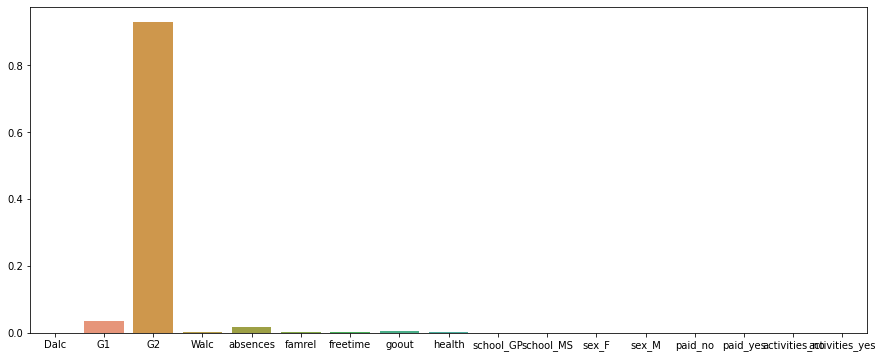

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(x=x.columns, y=rf.feature_importances_)
plt.show()

In [27]:
print("세 가지 모델을 훈련하고, 테스트 데이터에 대한 R2 score와 Root MSE를 비교해 보니, RandomForest의 R2가 0.93으로 가장 높으며, RMSE는 0.79로 가장 작았다. 새 가지 모델 중에서는 RandomForest 알고리즘이 가장 적합하다고 판단된다.")
print("그리고 지금 분석에서는 모든 모델에 대해 기본 파라미터로 학습한 결과이므로, 하이퍼파라미터 튜닝을 진행한다면 최적화된 모델을 도출할 수 있고, 조금 더 나은 성능을 기대해볼 수 있다.")
print("또한, 본 분석에서는 도메인 지식의 부족으로 적절한 이상치 제거를 수행하지 못했다. 이상치 제거는 도메인 지식이 있는 사람의 조언이 필요하며, 조언에 따라 적절한 이상치 제거가 수행된다면 모델의 개선 포인트가 될 수 있다.")

세 가지 모델을 훈련하고, 테스트 데이터에 대한 R2 score와 Root MSE를 비교해 보니, RandomForest의 R2가 0.93으로 가장 높으며, RMSE는 0.79로 가장 작았다. 새 가지 모델 중에서는 RandomForest 알고리즘이 가장 적합하다고 판단된다.
그리고 지금 분석에서는 모든 모델에 대해 기본 파라미터로 학습한 결과이므로, 하이퍼파라미터 튜닝을 진행한다면 최적화된 모델을 도출할 수 있고, 조금 더 나은 성능을 기대해볼 수 있다.
또한, 본 분석에서는 도메인 지식의 부족으로 적절한 이상치 제거를 수행하지 못했다. 이상치 제거는 도메인 지식이 있는 사람의 조언이 필요하며, 조언에 따라 적절한 이상치 제거가 수행된다면 모델의 개선 포인트가 될 수 있다.


##  2. 통계분석 (50점) 

<br>
2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 ) <br>
2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br> <br>
2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>

alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> <br>
2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>


In [28]:
import mglearn
x, y = mglearn.datasets.load_extended_boston()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
pred = lr.predict(x_test)

In [33]:
mse = mean_squared_error(pred, y_test, squared=False)
r2 = r2_score(pred, y_test)

In [34]:
print(f'Linear Regression의 Test data에 대한 결정계수는 {r2}, RMSE 값은 {mse} 이다.')

Linear Regression의 Test data에 대한 결정계수는 0.8288540761902685, RMSE 값은 3.880162487330179 이다.


## 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.

In [35]:
alpha_list = np.arange(0, 1.1, 0.1)
alpha_list

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [36]:
r2_before = 0
max_a = None
for a in alpha_list:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)

    pred = ridge.predict(x_test)

    r2 = r2_score(pred, y_test)

    if r2 > r2_before:
        r2_before = r2
        max_a = a
        print(f'{a}, {r2}')

ridge = Ridge(alpha=a)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)

r2 = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)

0.0, 0.8280096320035922
0.1, 0.8330964348881935


In [37]:
pred = ridge.predict(x_test)

In [38]:
mse = mean_squared_error(pred, y_test, squared=False)
r2 = r2_score(pred, y_test)

In [39]:
print(f'Ridge Regression의 최대 결정계수 알파는 {max_a} 이며, 해당 모델의 Test data에 대한 결정계수는 {r2_before}, RMSE 값은 {mse} 이다.')

Ridge Regression의 최대 결정계수 알파는 0.1 이며, 해당 모델의 Test data에 대한 결정계수는 0.8330964348881935, RMSE 값은 3.675058733832261 이다.


## 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.

In [40]:
r2_before = 0
max_a = None
for a in alpha_list:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)

    pred = lasso.predict(x_test)
    r2 = r2_score(pred, y_test)

    if r2 > r2_before:
        r2_before = r2
        max_a = a
        print(f'{a}, {r2}')

lasso = Lasso(alpha=a)
lasso.fit(x_train, y_train)

pred = lasso.predict(x_test)

r2 = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test, squared=False)

0.0, 0.8237907094886217


In [41]:
print(f'Lasso Regression의 최대 결정계수 알파는 {max_a} 이며, 해당 모델의 Test data에 대한 결정계수는 {r2_before}, RMSE 값은 {mse} 이다.')

Lasso Regression의 최대 결정계수 알파는 0.0 이며, 해당 모델의 Test data에 대한 결정계수는 0.8237907094886217, RMSE 값은 7.847551249693776 이다.


# 2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.

In [42]:
## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

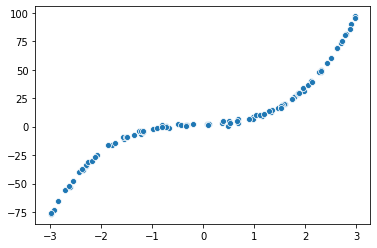

In [43]:
sns.scatterplot(x=X.ravel(), y=y.ravel())

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
# 다항식 변환 
poly_ftr_2 = PolynomialFeatures(degree=2).fit_transform(X)
poly_ftr_3 = PolynomialFeatures(degree=3).fit_transform(X)

model_1 = LinearRegression()
model_1.fit(X, y)

model_2 = LinearRegression()
model_2.fit(poly_ftr_2, y)

model_3 = LinearRegression()
model_3.fit(poly_ftr_3, y)

LinearRegression()

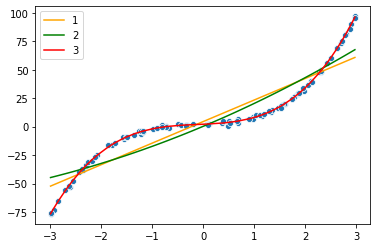

In [46]:
sns.scatterplot(x=X.ravel(), y=y.ravel())
color_list = ["orange", "green", "red"]
for k, v in {"1": [X, model_1], "2": [poly_ftr_2, model_2], "3": [poly_ftr_3, model_3]}.items():
    y_newbig = v[1].predict(v[0])
    sns.lineplot(x=X.ravel(), y=y_newbig.ravel(), label=k, color=color_list[int(k) - 1])

## 3. ANOVA분석 (9점)<br>
변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

In [47]:
avocado = pd.read_csv('../ADP_book_ver01/data/avocado.csv')
avocado = avocado[["AveragePrice", "type", "region"]]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston' )| (avocado['region']=='Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [48]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.graphics.factorplots import interaction_plot

In [49]:
### Two-way ANOVA
formula = 'AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula, avocado).fit()

aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


In [50]:
print('상호작용 효과를 가장 먼저 검증한다.')

print('H0: 아보카도 타입과 지역 변수 사이에 평균 가격에 대한 상호작용 효과가 없다.')
print('H1: 아보카도 타입과 지역 변수 사이에 평균 가격에 대한 상호작용 효과가 있다.')

상호작용 효과를 가장 먼저 검증한다.
H0: 아보카도 타입과 지역 변수 사이에 평균 가격에 대한 상호작용 효과가 없다.
H1: 아보카도 타입과 지역 변수 사이에 평균 가격에 대한 상호작용 효과가 있다.


In [51]:
print('상호작용에 대한 F 검정통계량은 13.87, p-value 0.000으로 귀무가설을 기각한다. 타입과 지역 변수 사이에 상호작용 효과가 있다고 볼 통계적 근거가 충분하다.')
print('Intercation plot을 살펴보면, type에 따라 지역의 평균 가격 순위가 뒤바뀌는 것을 볼 수 있다. 이는 두 변수 간 교호작용의 존재를 시사한다.')

상호작용에 대한 F 검정통계량은 13.87, p-value 0.000으로 귀무가설을 기각한다. 타입과 지역 변수 사이에 상호작용 효과가 있다고 볼 통계적 근거가 충분하다.
Intercation plot을 살펴보면, type에 따라 지역의 평균 가격 순위가 뒤바뀌는 것을 볼 수 있다. 이는 두 변수 간 교호작용의 존재를 시사한다.


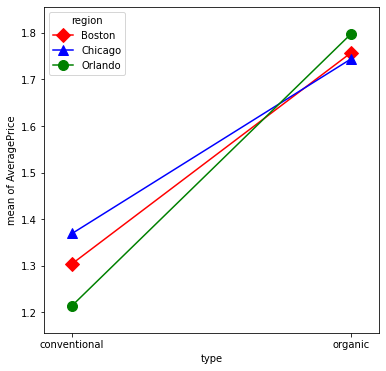

In [52]:
### interaction plot
# 교호작용 확인
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
type = avocado["type"]
region = avocado["region"]
price = avocado["AveragePrice"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(type, region, price, colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax) # 변수는 x1, x2 y 순